# I. Theory
## 1. Gaussian Process definition
A Gaussian Process (GP) defines a prior of the distribution of functions, and any finite number of these functions have a joint Gaussian distribution. The distribution of functions is usually unknown, but here, in order to make predictions, we arbitrarily define it as a Gaussian Process. Say we have input data $x_1, x_2, ...,x_N$, and a Gaussian Process assumes that $p(f(x_1), f(x_2), ..., f(x_N))$ is joint Gaussian. 

A Gaussian Process is completely defined by its mean $m(x)$ and covariance $\sum$. 
$$m(x) = E[f(x)] $$
$$\sum = E[(f(x) - m(x))(f(x^{'}) - m(x^{'}))] \tag{1}$$

The covariance function of a Gaussian Process is a measure of the similarity between points to predict the value for an unseen point from training data, and is represented as kernel. 
$$\sum = K(x,x^{'}) \tag{2}$$

Therefore, any 2 functions $f(x)$ and $f(x^{'})$ in a Gaussian Process can be written in a joint Gaussian:
$$\begin{bmatrix} f(x) \\ 
f(x^{'})\end{bmatrix} 
\sim N
(\begin{bmatrix} \mu(x) \\ \mu(x^{'})\end{bmatrix},
\begin{bmatrix} K(x,x) & K(x,x^{'}) \\ K(x^{'},x) & K(x^{'},x^{'}) \end{bmatrix})
\tag{3}$$

mean vector $m$ is an $n \times 1$ vector (which is always taken as 0) and covariance matrix $\sum$ is an  $n \times n$ matrix. 
$$ m = \begin{bmatrix} \mu(x) \\ \mu(x^{'})\end{bmatrix} = 0$$
$$ \sum = 
\begin{bmatrix} K(x,x) & K(x,x^{'}) \\ K(x^{'},x) & K(x^{'},x^{'}) \end{bmatrix})\tag{4}$$

We can then represent a Gaussian Process by its mean and covariance
$$ f(x) \sim GP(m(x), K(x,x^{'})) \tag{5}$$

There are different types of covariance matrix $K(x,x^{'})$. A commonly used one is squared exponential (SE), written as 
$$ cov(f(x), f(x^{'})) = K(x,x^{'}) = exp(-\frac{1}{2}|x - x^{'}|^2) \tag{6}$$
Note that kernel is positive definite and the difference between $x$ and $x^{'}$ is also non-negative. 


## 2. From joint distribution to marginal distribution
Now that we have the joint distribution of $f(x), f(x^{'})$ given by equation $(3)$, we can derive the marginal distribution of $f(x^{'})$:

$$f(x^{'})|x,x^{'},f(x) \sim N(K(x^{'},x)K(x,x)^{-1}f(x), K(x^{'},x^{'}) - K(x^{'},x)K(x,x)^{-1}K(x,x^{'})) \tag{7}$$

## 3. Cholesky decomposition
We can compute kernel functions $K$ in equation $(7)$, however, matrix inversion can be computationally expensive. Usually, we use Choleskly decomposition for the covariance matrix $K$ which is symmetic and positive definite matrix. 

$$K = LL^T \tag{8}$$
$L$ is a lower triangular matrix and it is much easier to compute the inverse of a triangular matrix and there exist numerical solutions. The computation of $L$ is numerically extremely stable and takes time $\frac{n^3}{6}$, while the inverse of the original matrix $K$ takes time $n^3$. 

Then the original matrix inverse is computed simply by multiplying the two inverses as:
$$K^{-1} = (LL^T)^{-1} = (L^{-1})^T(L^{-1}) \tag{9}$$


To solve a linear function:
$$Kx = b \tag{10.a}$$
write it as 
$$LL^Tx = b \tag{10.b}$$
First solve 
$$Ly = b \tag{10.c}$$ and by substitution 
$$L^Tx = y \tag{10.d} $$
Thus, we can get $x$ by solving equation $10.d$. 
Denote $K\backslash b$ as solving a function $Kx=b$, thus we can get $ x$ as 
$$x = L^T\backslash(L\backslash b) \tag{11}$$

## 4. Use Cholesky decomposition to compute marginal distribution
We first compute the Cholesky decomposition for $K(x,x)$ and $K(x^{'},x)$.
$$L = cholesky(K(x,x) + \sigma^2_nI) \tag{12.a}$$
$$L_{ss} = cholesky(K(x^{'},x^{'}) + \sigma^2_nI) \tag{12.b}$$

$$K(x,x^{'}) = K(x^{'},x)^T \tag {12.c} $$

Note that we add a small identity matrix $I$ for numerical reasons. This is because the eigenvalues of the matrix $K$ can decay very rapidly and without stabilization the Cholesky decomposition fails. The effect is similar to adding additional independent noise of variance $\sigma^2_n$.

In equation $7$, we already have an expression for the mean and variance of the marginal distribution of $f(x^{'})$ with estimated mean:

$$ \bar{f(x^{'})} = K(x^{'},x)(K(x,x) + \sigma^2_nI)^{-1}f(x) = K(x,x^{'})^T(K(x,x) + \sigma^2_nI)^{-1}y \tag{13} $$

Rewrite equation 13 using $\alpha$. 

$$ \alpha = (K(x,x) + \sigma^2_nI)^{-1}y \tag{14.a}$$

Equivalent to equation $10.a$, the coefficient matrix here is $(K(x,x) + \sigma^2_nI)$, which has the Cholesky decomposition as $L$. 

Thus solving equation, we have
$$\alpha = L^T\backslash (L\backslash y) \tag {14.b}$$

Using equation $14.b$ in equation $13$, we have 
$$ \bar{f(x^{'})}  = K(x,x^{'})^T \alpha \tag {15}$$

We can compute the variance of the prediction. From equation $7$, we have the variance as:

$$V(f(x^{'}) = K(x^{'},x^{'}) - K(x^{'},x)K(x,x)^{-1}K(x,x^{'}) \tag {16}$$

The second component can be written as 
$$ K(x^{'},x)K(x,x)^{-1}K(x,x^{'})  = K(x,x^{'})^T (LL^T)^{-1}K(x,x^{'})
= (L^{-1} K(x,x^{'}))^T (L^{-1}K(x,x^{'})) \tag {17}$$

Use
$$ v = L^{-1} K(x,x^{'}) \tag {18.a} $$
Since $K(x,x^{'}) $ is a known matrix, we can easily compute $v$ by solving 
$$v = L \backslash K(x,x^{'}) \tag{18.b}$$
Therefore, 
$$V(f(x^{'})) = K(x^{'},x^{'}) - v^Tv \tag {19}$$

In conclusion, we have the predicted mean and variance of the function $f(x^{'})|x,x^{'},f(x)$ from equation $15$ and $19$. 


## 5. Gaussian Process regression algorithm
input $x$ with known target $y$, test input $x^{'}$, covariance function $K$, noise level $\sigma_n^2$

1. $L = choleskly(K(x,x),\sigma_n^2I)$
2. solve $\beta = L \backslash y$
3. solve $\alpha = L^T \backslash \beta$
4. mean $\bar{f(x^{'})}  = K(x,x^{'})^T \alpha $
5. solve $v = L \backslash K(x,x^{'}) $
6. variance $V(f(x^{'})) = K(x^{'},x^{'}) - v^Tv$

## 6. generate samples from Gaussian Process
1. $L = choleskly(K(x,x),\sigma_n^2I)$
2. generate sample $u \sim N(0,I)$ using normal Gaussian generator
3. compute $x = m + Lu$ where $m$ is the mean vector of GP functions

## references
- http://katbailey.github.io/post/gaussian-processes-for-dummies/
- http://www.gaussianprocess.org/gpml/chapters/RW.pdf
- https://makarandtapaswi.wordpress.com/2011/07/08/cholesky-decomposition-for-matrix-inversion/

# II. Implementation

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 5,5

## 1. Kernel run time

### (1) compare computation time of direct and indirect squared exponential kernel

In [2]:
# define kernel as RBF, squared expoonential
def kernel_1(x1,x2,length_scale=1): 
    # param is length scale
    # generate RBF kernel from 2 vectors 1, x2 
    # k(x_i, x_j) = exp(-1 / 2 d(x_i / length_scale, x_j / length_scale)^2)
    # (x-y)**2 ==> do element wise and then square
    # dot product of 2 matrix
    sq_dist1 = np.absolute((x1 - x2.T)*((x1-x2.T).T)) # not dot product but multiply
    return np.exp(- 1 * sq_dist1/ (2 * length_scale))

def kernel_2(x1,x2,length_scale=1): 
    # param is length scale
    # generate RBF kernel from 2 vectors 1, x2 
    # k(x_i, x_j) = exp(-1 / 2 d(x_i / length_scale, x_j / length_scale)^2)
    # (x-y)**2 ==> do element wise and then square
    sq_dist2 = np.sum(x1**2, 1).reshape(-1,1) + np.sum(x2**2, 1) - 2 * np.dot(x1,x2.T) 
    # print (sqdist.shape)
    return np.exp(- 1 * sq_dist2/ (2 * length_scale))

In [3]:
import time
ls = [10, 100, 1000, 5000, 10000, 20000]
ts1 = []
ts2 = []
diff = []
for n in ls:
    x1 = np.linspace(0,100,n).reshape(-1,1)
    t0 = time.time()
    s1 = kernel_1(x1,x1) # direct computation is slower than indirect ones
    t1 = time.time() - t0
    t0 = time.time()
    s2 = kernel_2(x1,x1) # direct computation is slower than indirect ones
    t2 = time.time() - t0
    ts1.append(t1)
    ts2.append(t2)
    diff.append((t1-t2))

Text(0, 0.5, 'run time (s)')

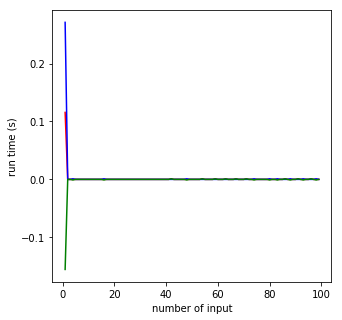

In [20]:
plt.plot(ls,ts1, c = 'r')
plt.plot(ls,ts2, c = 'b')
plt.plot(ls,diff, c = 'green')
plt.xlabel('number of input')
plt.ylabel('run time (s)')

### (2) compare computation time of direct and indirect rbf kernel of small size
- total number of hyperparameter used in our model
- does not diff much at lower number of input

In [21]:
ls = list(range(1,100))

In [22]:
ts1 = []
ts2 = []
diff = []
for n in ls:
    x1 = np.linspace(0,100,n).reshape(-1,1)
    t0 = time.time()
    s1 = kernel_1(x1,x1) # direct computation is slower than indirect ones
    t1 = time.time() - t0
    t0 = time.time()
    s2 = kernel_2(x1,x1) # direct computation is slower than indirect ones
    t2 = time.time() - t0
    ts1.append(t1)
    ts2.append(t2)
    diff.append((t1-t2))

Text(0, 0.5, 'run time (s)')

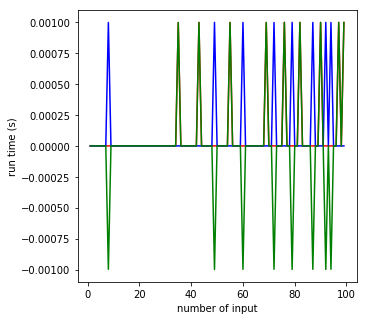

In [23]:
plt.plot(ls,ts1, c = 'r')
plt.plot(ls,ts2, c = 'b')
plt.plot(ls,diff, c = 'green')
plt.xlabel('number of input')
plt.ylabel('run time (s)')

## 2. implement Gaussian Process from scratch

In [24]:
def kernel(x1,x2,length_scale=1): 
    # use the fast implementation
    sq_dist2 = np.sum(x1**2, 1).reshape(-1,1) + np.sum(x2**2, 1) - 2 * np.dot(x1,x2.T) 
    # print (sqdist.shape)
    return np.exp(- 1 * sq_dist2/ (2 * length_scale))

In [49]:
# given 2 known points and unknown function, with function prediction at Xtest
Xtest = np.linspace(5,20,300).reshape(-1,1)
Xtrain = np.array([5, 20]).reshape(-1,1)
ytrain = abs(np.exp(1/Xtrain) * np.sin(Xtrain)) # an unknown function

In [50]:
# length means effect of significant change, could be discrete hyperparameters
length_scale = 3
sigma = 1e-6

# covariance matrix of the joint gaussian function distribution N(mu,sigma)
# used to draw sample function
K = kernel(Xtrain, Xtrain, length_scale)
K_s = kernel(Xtrain, Xtest, length_scale)
K_s_t = kernel(Xtest, Xtrain, length_scale) # transpose of K_s
K_ss = kernel(Xtest, Xtest, length_scale)

### (1) prior distribution of functions without any training data

In [51]:
L_ss = np.linalg.cholesky(K_ss + sigma *np.eye(len(Xtest)))
L_ss.shape

(300, 300)

In [52]:
# sample from gaussian with covariance K_ss and mean 0
# this the prior distribution of functions for test points
mean_prior = 0
f_prior = mean_prior + np.dot(L_ss, np.random.normal(size=(len(Xtest),10)))

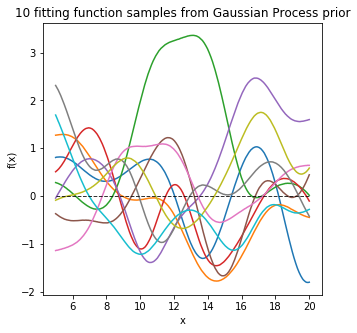

In [63]:
plt.plot(Xtest, f_prior)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot([5,20],[0,0],c='black',linestyle = "--",linewidth='1',alpha=0.8)
plt.title('10 fitting function samples from Gaussian Process prior')
rcParams['figure.figsize'] = 5,5
plt.show()

In [ ]:
### (2) posterior distributions with training data

In [68]:
a = np.array([[1,2,3],[4,5,5]])
np.matrix.transpose(a)

array([[1, 4],
       [2, 5],
       [3, 5]])

In [69]:
L = np.linalg.cholesky(K + sigma*np.eye(len(Xtrain)))
beta= np.linalg.solve(L,ytrain)
L_T = np.matrix.transpose(L)
alpha = np.linalg.solve(L_T, beta)
alpha

array([[1.17123158],
       [0.95975199]])

In [70]:
f_mean = np.dot(K_s_t, alpha)
f_mean.shape

(300, 1)

In [73]:
v = np.linalg.solve(L, K_s)
# v_T = np.matrix.transpose(v)
# V = K_ss - np.dot(v_T,v)
# f_V = np.diag(V)
# f_stdv = np.sqrt(f_V)

f_V = np.diag(K_ss) - np.sum(v**2, axis=0)
f_stdv = np.sqrt(f_V)
f_stdv

array([9.99999500e-04, 2.89752335e-02, 5.78881668e-02, 8.67341458e-02,
       1.15472824e-01, 1.44067681e-01, 1.72483277e-01, 2.00684957e-01,
       2.28638866e-01, 2.56312033e-01, 2.83672460e-01, 3.10689224e-01,
       3.37332570e-01, 3.63574004e-01, 3.89386374e-01, 4.14743953e-01,
       4.39622509e-01, 4.63999366e-01, 4.87853465e-01, 5.11165411e-01,
       5.33917510e-01, 5.56093807e-01, 5.77680105e-01, 5.98663981e-01,
       6.19034797e-01, 6.38783692e-01, 6.57903580e-01, 6.76389126e-01,
       6.94236727e-01, 7.11444477e-01, 7.28012128e-01, 7.43941041e-01,
       7.59234142e-01, 7.73895853e-01, 7.87932037e-01, 8.01349923e-01,
       8.14158037e-01, 8.26366123e-01, 8.37985063e-01, 8.49026791e-01,
       8.59504211e-01, 8.69431109e-01, 8.78822060e-01, 8.87692344e-01,
       8.96057854e-01, 9.03935007e-01, 9.11340655e-01, 9.18292003e-01,
       9.24806519e-01, 9.30901855e-01, 9.36595767e-01, 9.41906039e-01,
       9.46850410e-01, 9.51446508e-01, 9.55711781e-01, 9.59663440e-01,
      

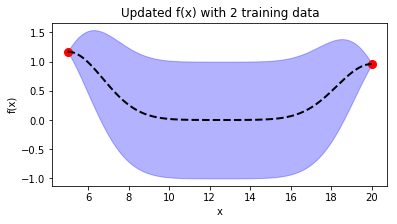

In [82]:
# f_post = f_mean + np.dot(L_p, np.random.normal(size=(n,3)))

plt.plot(Xtrain, ytrain, 'ro', ms=8)
plt.gca().fill_between(Xtest.flat, 
                       f_mean.reshape(len(f_mean),)-f_stdv,
                       f_mean.reshape(len(f_mean),)+f_stdv, 
                       color="blue",
                       alpha = 0.3)
plt.plot(Xtest, f_mean, c ='black',linestyle='--', lw=2)
plt.title('Updated f(x) with 2 training data')
plt.xlabel('x')
plt.ylabel('f(x)')
rcParams['figure.figsize'] = 6,3
plt.show()

### 3. incrementally increase number of training data

In [83]:
def gp_process(Xtrain, ytrain, n=20, length_scale = 2, sigma = 1e-6):
    x_min = np.min(Xtrain)
    x_max = np.max(Xtrain)
    Xtest = np.linspace(x_min, x_max, n).reshape(-1,1)
    
    ############# GP algorithm start #############
    K = kernel(Xtrain, Xtrain, length_scale)
    K_s = kernel(Xtrain, Xtest, length_scale)
    K_s_t = kernel(Xtest, Xtrain, length_scale) # transpose of K_s
    K_ss = kernel(Xtest, Xtest, length_scale)


    L = np.linalg.cholesky(K + sigma*np.eye(len(Xtrain)))
    beta= np.linalg.solve(L,ytrain)
    L_T = np.matrix.transpose(L)
    alpha = np.linalg.solve(L_T, beta)
    
    f_mean = np.dot(K_s_t, alpha)

    v = np.linalg.solve(L, K_s)
    f_V = np.diag(K_ss) - np.sum(v**2, axis=0)
    f_stdv = np.sqrt(f_V)
    ############# GP algorithm end ###############
    
    plt.plot(Xtrain, ytrain, 'ro', ms=8)
    plt.gca().fill_between(Xtest.flat, 
                           f_mean.reshape(len(f_mean),)-f_stdv,
                           f_mean.reshape(len(f_mean),)+f_stdv, 
                           color="blue",
                           alpha = 0.3)
    plt.plot(Xtest, f_mean, c ='black',linestyle='--', lw=2)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    # plt.gca().fill_between(Xtest.flat, -1, acq, color="green",alpha=0.6)
    # plt.plot(Xtest,acq,'green')
    plt.show()

In [84]:
def f(x):
    return abs(np.exp(1/(x+0.001)) * np.sin(x))

In [85]:
x1 = np.array([5, 20]).reshape(-1,1)
x2 = np.array([5, 8, 20]).reshape(-1,1)
x3 = np.array([5, 8, 12, 20]).reshape(-1,1)
x4 = np.array([5, 8, 12, 17, 20]).reshape(-1,1)
x5 = np.array([5, 8, 12, 17, 19, 20]).reshape(-1,1)
x6 = np.array([5, 8, 12, 17, 19, 20, 23]).reshape(-1,1)


y1 = f(x1)
y2 = f(x2)
y3 = f(x3)
y4 = f(x4)
y5 = f(x5)
y6 = f(x6)

ls1 = 1
ls2 = 2
ls3 = 10
ls4 = 0.5
ls5 = 0.1
n1 = 10
n2 = 20
n3 = 50

#### a. effect of n on prediction

number of test data is 10


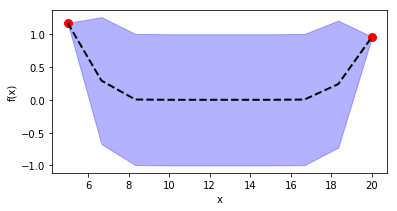

number of test data is 20


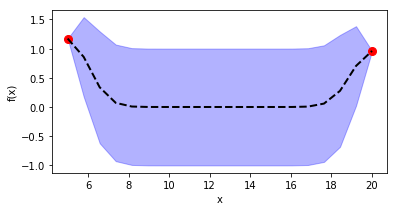

number of test data is 50


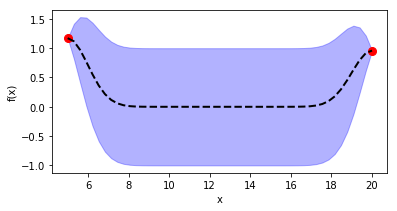

In [86]:
print ("number of test data is %d"%n1)
gp_process(x1,y1, n=n1, length_scale = 1, sigma = 1e-6)
print ("number of test data is %d"%n2)
gp_process(x1,y1, n=n2, length_scale = 1, sigma = 1e-6)
print ("number of test data is %d"%n3)
gp_process(x1,y1, n=n3, length_scale = 1, sigma = 1e-6)

#### b. effect of length scale on prediction

length scale is 0.1


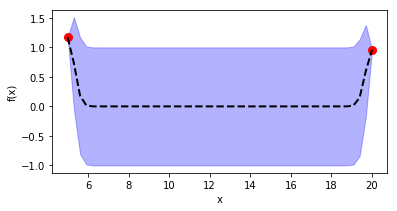

length scale is 0.5


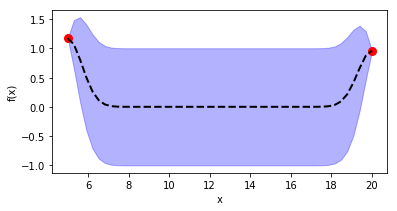

length scale is 1.0


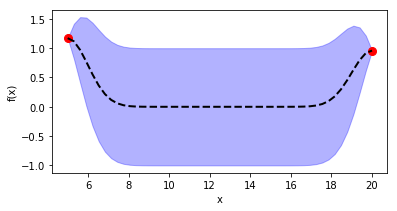

length scale is 2.0


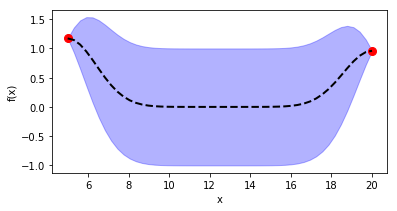

length scale is 10.0


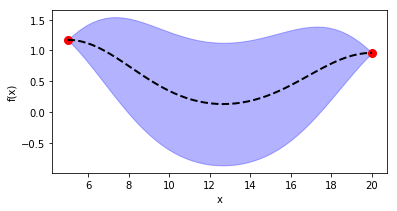

In [87]:
print ("length scale is %.1f"%ls5)
gp_process(x1,y1, n=50, length_scale = ls5, sigma = 1e-6)
print ("length scale is %.1f"%ls4)
gp_process(x1,y1, n=50, length_scale = ls4, sigma = 1e-6)
print ("length scale is %.1f"%ls1)
gp_process(x1,y1, n=50, length_scale = ls1, sigma = 1e-6)
print ("length scale is %.1f"%ls2)
gp_process(x1,y1, n=50, length_scale = ls2, sigma = 1e-6)
print ("length scale is %.1f"%ls3)
gp_process(x1,y1, n=50, length_scale = ls3, sigma = 1e-6)

#### c. number of training data

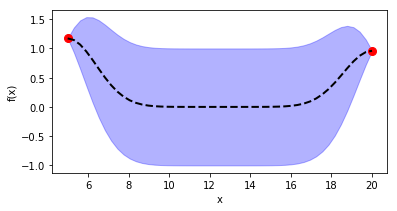

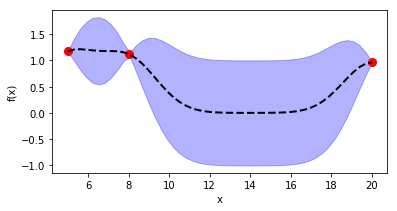

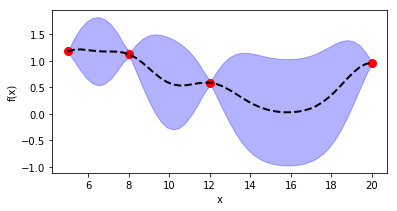

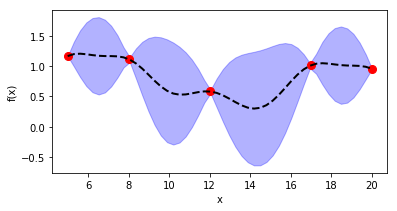

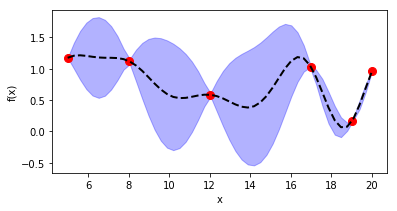

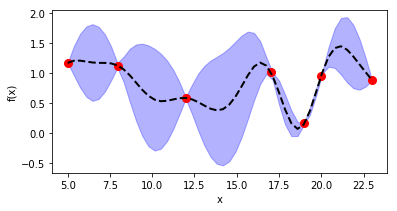

In [88]:
gp_process(x1,y1, n=50, length_scale = 2, sigma = 1e-6)
gp_process(x2,y2, n=50, length_scale = 2, sigma = 1e-6)
gp_process(x3,y3, n=50, length_scale = 2, sigma = 1e-6)
gp_process(x4,y4, n=50, length_scale = 2, sigma = 1e-6)
gp_process(x5,y5, n=50, length_scale = 2, sigma = 1e-6)
gp_process(x6,y6, n=50, length_scale = 2, sigma = 1e-6)